# H1B VISA DATA ANALYSIS

# importing libraries

In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading  csv file

In [4]:
f = pd.read_csv("h1b_kaggle.csv")
f.head()


,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


deleting unnamed column

In [5]:
del f['Unnamed: 0']
len(f)

3002458

In [6]:
f = f.dropna()
f.reset_index()
lng = len(f)
print(lng)

2877765


In [6]:
f.head()


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


TOP EMPLOYERS

In [7]:
f.EMPLOYER_NAME.value_counts().head(15)

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
LARSEN & TOUBRO INFOTECH LIMITED                    17457
CAPGEMINI AMERICA INC                               16725
GOOGLE INC.                                         16473
IBM CORPORATION                                     13276
IGATE TECHNOLOGIES INC.                             12564
Name: EMPLOYER_NAME, dtype: int64

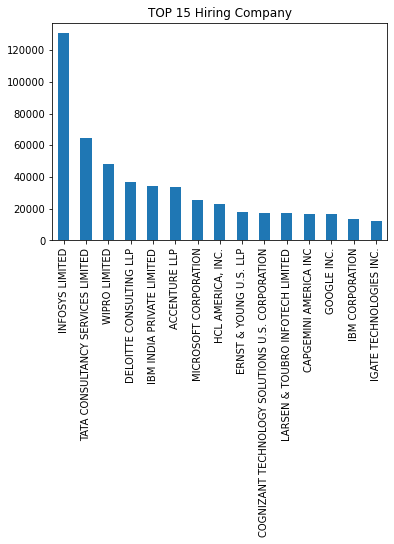

In [8]:
f['EMPLOYER_NAME'].value_counts().head(15).plot(kind = 'bar',title = "TOP 15 Hiring Company") 

ANALYZING THE PREVAILING WAGE

In [21]:
f.PREVAILING_WAGE.value_counts().sort_values(ascending = False ).head()

60000.0    10185
55245.0     6745
62566.0     6480
58053.0     5683
52499.0     5492
Name: PREVAILING_WAGE, dtype: int64

In [9]:
f.PREVAILING_WAGE.mean()

146998.43191514706

In [24]:
###Wages given by the employers

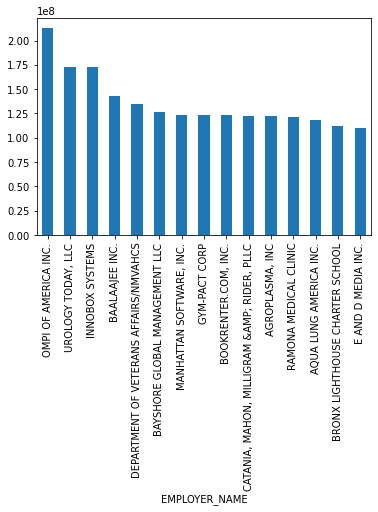

In [10]:
a = f.groupby(['EMPLOYER_NAME']).mean()['PREVAILING_WAGE'].nlargest(15).plot(kind = 'bar')

WORKSITE 

In [11]:
f['WORKSITE'].value_counts().head(20)

NEW YORK, NEW YORK            191719
HOUSTON, TEXAS                 83889
SAN FRANCISCO, CALIFORNIA      62787
ATLANTA, GEORGIA               52193
CHICAGO, ILLINOIS              51497
SAN JOSE, CALIFORNIA           50083
SUNNYVALE, CALIFORNIA          35136
DALLAS, TEXAS                  31628
BOSTON, MASSACHUSETTS          31471
REDMOND, WASHINGTON            30667
CHARLOTTE, NORTH CAROLINA      30269
MOUNTAIN VIEW, CALIFORNIA      29479
IRVING, TEXAS                  29392
SAN DIEGO, CALIFORNIA          28881
SANTA CLARA, CALIFORNIA        28167
JERSEY CITY, NEW JERSEY        27022
AUSTIN, TEXAS                  26865
SEATTLE, WASHINGTON            26859
LOS ANGELES, CALIFORNIA        26517
PHILADELPHIA, PENNSYLVANIA     24161
Name: WORKSITE, dtype: int64

In [12]:
f.loc[:,'WORKSITE'] = f.loc[:,'WORKSITE'].apply(lambda rec:rec.split(',')[1][1:])
def change_NA(rec):
    if (rec=='NA') :
        return 'MARIANA ISLAND'
    return rec
f.loc[:,'WORKSITE'] = f.loc[:,'WORKSITE'].apply(lambda rec: change_NA(rec))
print(len(f['WORKSITE'].unique()))

53


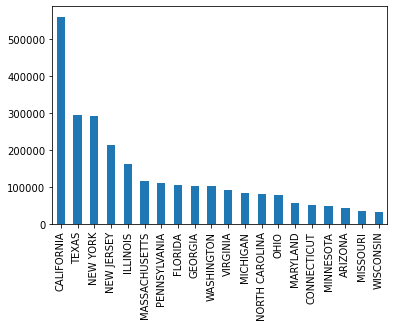

In [13]:
f['WORKSITE'].value_counts().head(20).plot(kind='bar')

Changing the columns name

In [14]:
f.rename(columns ={'EMPLOYER_NAME':'EMPLOYER','FULL_TIME_POSITION':'FULL_T','PREVAILING_WAGE':'PREV_WAGE','WORKSITE':'STATES','lon':'LON','lat':'LAT'},inplace = True)

In [34]:
columns_to_keep = ['CASE_STATUS','YEAR','STATES','SOC_NAME','JOB_TITLE','FULL_T','PREV_WAGE','EMPLOYER','LON','LAT']
f =f[columns_to_keep]
f.columns

Index(['CASE_STATUS', 'YEAR', 'STATES', 'SOC_NAME', 'JOB_TITLE', 'FULL_T',
       'PREV_WAGE', 'EMPLOYER', 'LON', 'LAT'],
      dtype='object')

Setting the precision value upto 2 decimal place 

In [15]:
f['LON'] = f['LON'].apply(lambda lon : float("% .2f" %lon))

In [16]:
f['LAT'] = f['LAT'].apply(lambda lat : float("% .2f" %lat))

In [17]:
f.head()

,CASE_STATUS,EMPLOYER,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,YEAR,STATES,LON,LAT
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.74,42.28
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.70,33.02
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.08,40.73
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.99,39.74
4,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.20,38.63


In [18]:
f['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED', nan],
      dtype=object)

calculating the petition ditribution by  case status

In [19]:
s_f = [0]*7
states = ['CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED',
       'REJECTED', 'INVALIDATED',
       'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']
for i in range(0,7):
    s_f[i]= f[f.CASE_STATUS == states[i]]['CASE_STATUS'].count()
s_f

[202659, 89799, 2615623, 94346, 2, 1, 15]

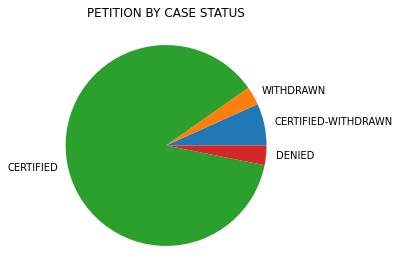

In [20]:
from matplotlib.pyplot import pie , axis , show
plt.figure(figsize=(4.5,4.5))
plt.title("PETITION BY CASE STATUS")
axis('equal')
pie(s_f[:4],labels = states[:4])
show()

calculating petitions distribution per year

In [21]:
f['YEAR'].unique()

array([2016., 2015., 2014., 2013., 2012., 2011.,   nan])

In [22]:
y = [2016., 2015., 2014., 2013., 2012., 2011.]
y_c = [0]*6
for j in range(0,6):
    y_c[j] = f[f.YEAR==y[j]]['YEAR'].count()
y_c

[647803, 618727, 519427, 442114, 415607, 358767]

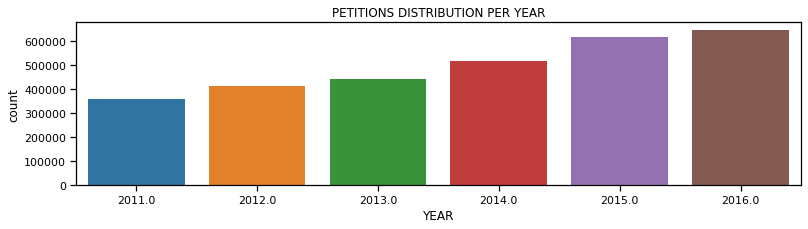

In [23]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize = (13,3))
plt.title("PETITIONS DISTRIBUTION PER YEAR")
sns.countplot(f['YEAR'])

ANALYZING DENIED PETITIONS PER YEAR

In [24]:
den = f[f.CASE_STATUS=='DENIED']
len(den)

94346

In [25]:
del den['CASE_STATUS']
den = den.reset_index()
den.head(2)

,index,EMPLOYER,SOC_NAME,JOB_TITLE,FULL_T,PREV_WAGE,YEAR,STATES,LON,LAT
0,39,"PARALLELS, INC.",CHIEF EXECUTIVES,CHIEF EXECUTIVE OFFICER,Y,187200.0,2016.0,WASHINGTON,-122.22,47.48
1,47,RANCHO LA PUERTA LLC,CHIEF EXECUTIVES,PRESIDENT,Y,197683.2,2016.0,CALIFORNIA,-117.16,32.72


Calculating denied petition distribution per year

In [26]:
d_y = [0]*6
for i in range(0,6):
    d_y[i]=den[den.YEAR==y[i]]['YEAR'].count()
d_y

[9175, 10923, 11896, 12126, 21096, 29130]

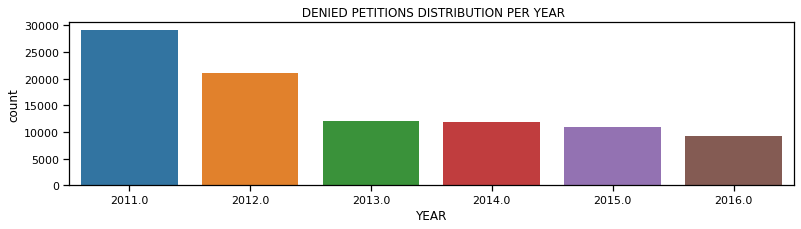

In [27]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize = (13,3))
plt.title(" DENIED PETITIONS DISTRIBUTION PER YEAR")
sns.countplot(den['YEAR'])

Calculating the rate at which denied petitins per year


In [28]:
d_y_r = [0]*6
for i in range(0,6):
    d_y_r[i] = float("% .2f" %((d_y[i]/y_c[i])*100))
ratio = pd.DataFrame()
ratio['YEAR'] = y
ratio['denied rate %'] = d_y_r
ratio = ratio.set_index(['YEAR'])
ratio


,denied rate %
YEAR,
2016.0,1.42
2015.0,1.77
2014.0,2.29
2013.0,2.74
2012.0,5.08
2011.0,8.12


In [29]:
ratio.T

YEAR,2016.0,2015.0,2014.0,2013.0,2012.0,2011.0
denied rate %,1.42,1.77,2.29,2.74,5.08,8.12


In [30]:
ratio = ratio.reset_index()
ratio

,YEAR,denied rate %
0,2016.0,1.42
1,2015.0,1.77
2,2014.0,2.29
3,2013.0,2.74
4,2012.0,5.08
5,2011.0,8.12


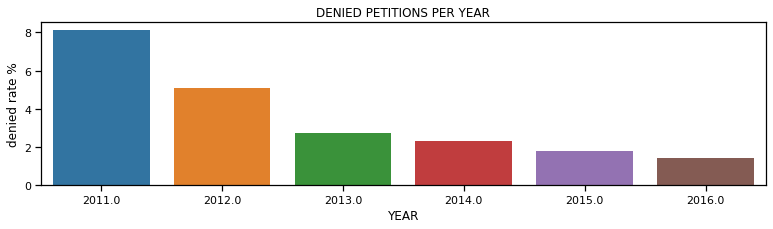

In [31]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize=(13,3))
plt.title("DENIED PETITIONS PER YEAR")
g = sns.barplot(x ='YEAR',y ='denied rate %',data=ratio)

Calculating the number of petitions filled by the states


In [32]:
f['STATES'].unique()

array(['MICHIGAN', 'TEXAS', 'NEW JERSEY', 'COLORADO', 'MISSOURI',
       'FLORIDA', 'CALIFORNIA', 'VIRGINIA', 'PENNSYLVANIA',
       'MASSACHUSETTS', 'WISCONSIN', 'ILLINOIS', 'DISTRICT OF COLUMBIA',
       'NORTH CAROLINA', 'RHODE ISLAND', 'OHIO', 'WASHINGTON', 'GEORGIA',
       'NEW YORK', 'INDIANA', 'MARYLAND', 'NEVADA', 'NEW HAMPSHIRE',
       'LOUISIANA', 'MINNESOTA', 'SOUTH CAROLINA', 'ARIZONA', 'TENNESSEE',
       'MISSISSIPPI', 'HAWAII', 'UTAH', 'DELAWARE', 'MARIANA ISLAND',
       'KANSAS', 'CONNECTICUT', 'MAINE', 'NEBRASKA', 'OKLAHOMA',
       'ARKANSAS', 'KENTUCKY', 'PUERTO RICO', 'ALASKA', 'WYOMING', 'IOWA',
       'OREGON', 'IDAHO', 'NEW MEXICO', 'WEST VIRGINIA', 'SOUTH DAKOTA',
       'NORTH DAKOTA', 'ALABAMA', 'VERMONT', 'MONTANA'], dtype=object)

In [34]:
US_states = ['ALABAMA','ALASKA','ARIZONA','ARKANSAS','CAALIFORNIA','COLORADO','CONNECTICUT','DELAWARE','DISTRICT OF COLUMBIA','FLORIDA','GEORGIA','HAWII','IDAHO','ILLINOIS','INDIANA','IOWA','KANSAS','KENTUCKY','LOUISTANA','MAINE','MARIANA ISLANDS','MARYLAND','MASSACHUUSSETS','MICHIGAN','MINNESOTA','MISSISSIPPI','MISSOURI','MONTANA','NEBRASKA','NEVADA','NEW HAMPSHIRE','NEW JERSEY','NEW MEXICO','NEW YORK','NORTH CAROLINA','NORTH DAKOTA','OHIO','OKALHOMA','OREGON','PENNSYLVANIA','PUERTO RICO','RHODE ISLAND','SOUTH CAROLINA','SOUTH DAKOTA','TENNESEE','TEXAS','UTAH','VERMONT','VIRGINIA','WASHINGTON','WEST VIRGINIA','WISCONSIN','WYOMING']
p_s = [0]*53
for i in  range(0,53):
    p_s[i]= f[f.STATES == US_states[i]]['STATES'].count()
pe = pd.DataFrame()
pe['STATES']= US_states
pe['FIELD PETITIONS'] = p_s
print(sum(p_s))

2268755


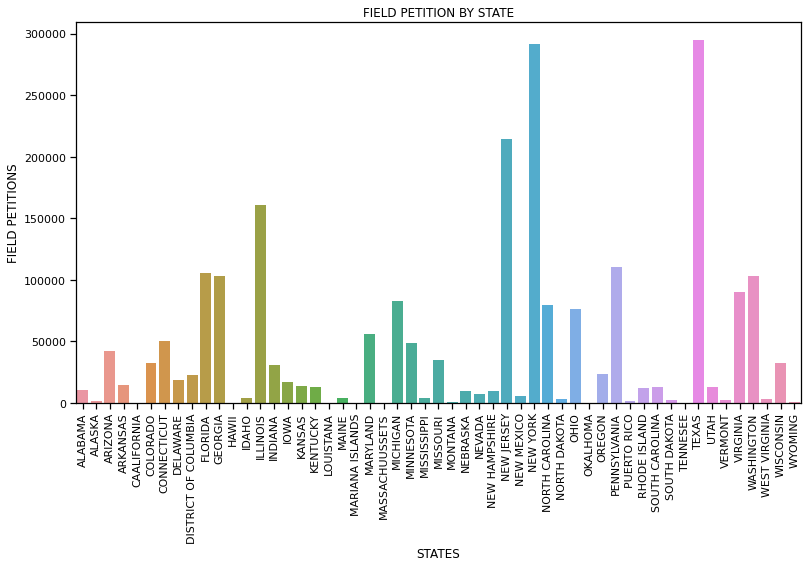

In [56]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize=(13,7))
plt.title("FIELD PETITION BY STATE")
g = sns.barplot(x ='STATES',y ='FIELD PETITIONS',data=pe)
v = g.set_xticklabels(g.get_xticklabels(),rotation = 90)

NO. OF PETITIONS DENIED BY STATE

In [49]:
deni = [0]*53
for i in range(0,53):
    deni[i]= den[den.STATES==US_states[i]]['STATES'].count()
de_s = pd.DataFrame()
de_s['STATES'] = US_states
de_s['DENIED PETITIONS'] = deni
de_s

,STATES,DENIED PETITIONS
0,ALABAMA,522
1,ALASKA,158
2,ARIZONA,1157
3,ARKANSAS,333
4,CAALIFORNIA,0
5,COLORADO,1143
6,CONNECTICUT,1236
7,DELAWARE,367
8,DISTRICT OF COLUMBIA,1182
9,FLORIDA,5577


In [50]:
print(sum(deni))

69911


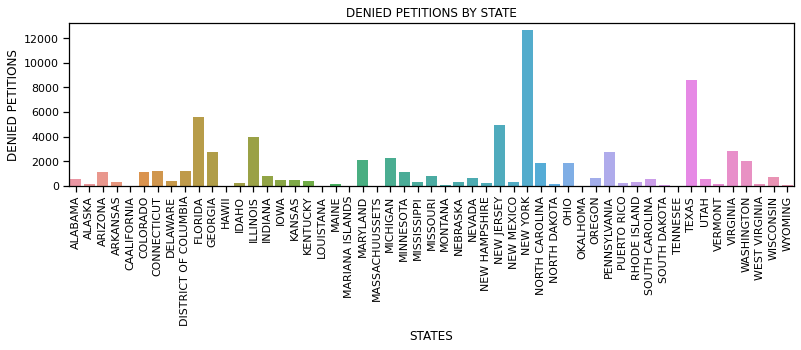

In [59]:
sns.set_context("notebook",font_scale = 1.0)
plt.figure(figsize=(13,3))
plt.title("DENIED PETITIONS BY STATE")
g = sns.barplot(x ='STATES',y ='DENIED PETITIONS',data=de_s)
v = g.set_xticklabels(g.get_xticklabels(),rotation = 90)